## Pair Programming Correlación y covarianza

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import researchpy as rp
from scipy.stats import levene
plt.rcParams["figure.figsize"] = (10,8) 

In [2]:
sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv",index_col =0)
sales.sample(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type
1466,503,Oregon,West,Small Market,112.0,146.0,288.0,145.0,60.0,40.0,1304.0,90.0,130.0,140.0,270.0,6,2011-07-01,Espresso,Decaf Espresso,Decaf
2652,650,California,West,Major Market,47.0,73.0,123.0,50.0,26.0,14.0,589.0,40.0,30.0,50.0,80.0,12,2010-11-01,Tea,Earl Grey,Regular


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza depende de la escala de las variables y la correlación toma valores entre -1 y 1. La covarianza indica si ambas variables varían el la misma dirección (si una aumenta y la otra también sería positiva y si una aumenta y la otra disminuye, sería covarianza negativa). La correlación es similar sólo que indica de qué tipo es : si es 0 , no hay correlación y cuanto más se acerque este valor a 1 ó -1 más fuerte será.

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [3]:
sales.corr() # correlacion

,area_code,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid
area_code,1.000000,0.050748,0.023084,0.032290,0.044882,0.021877,0.034969,0.046168,0.034840,0.066774,0.024066,0.046825,0.024297
profit,0.050748,1.000000,0.679517,0.678077,0.560632,0.168639,0.338935,0.371779,0.786490,0.483241,0.635901,0.614178,0.062634
margin,0.023084,0.679517,1.000000,0.842340,0.708399,0.364928,0.434993,0.266684,0.698354,0.580595,0.847736,0.773302,0.021372
sales,0.032290,0.678077,0.842340,1.000000,0.897648,0.410436,0.468749,0.281529,0.660305,0.703862,0.765206,0.855497,-0.029842
cogs,0.044882,0.560632,0.708399,0.897648,1.000000,0.449488,0.497927,0.346246,0.567080,0.798947,0.641231,0.799315,-0.063275
total_expenses,0.021877,0.168639,0.364928,0.410436,0.449488,1.000000,0.860492,0.133032,0.177890,0.445816,0.357308,0.426840,-0.065797
marketing,0.034969,0.338935,0.434993,0.468749,0.497927,0.860492,1.000000,0.284735,0.326558,0.501304,0.421071,0.488492,-0.027218
inventory,0.046168,0.371779,0.266684,0.281529,0.346246,0.133032,0.284735,1.000000,0.384393,0.373536,0.291848,0.344512,0.002309
budget_profit,0.034840,0.786490,0.698354,0.660305,0.567080,0.177890,0.326558,0.384393,1.000000,0.587998,0.816839,0.738006,-0.023871
budget_cogs,0.066774,0.483241,0.580595,0.703862,0.798947,0.445816,0.501304,0.373536,0.587998,1.000000,0.672105,0.823558,-0.108774


Distinguimos correlación de profit baja con total_expenses, marketing, inventory.

Correlación de profit moderada con margin, sales , cogs(gastos), su presupuesto (budget_cogs) y budget sales o presupuesto de ventas. 
La correlación más alta se  corresponde con budget profit, como era de esperar.

Nos llama la atención que los costes no están relacionados con el beneficio, esto puede ser porque haya productos de coste alto y poco beneficio.


In [4]:
sales.cov() # covarianza

,area_code,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid
area_code,48903.036653,541.022419,251.672047,546.881254,336.145816,105.818188,127.390238,3022.822000,299.741994,552.619499,267.503960,815.168484,19.687178
profit,541.022419,2324.136578,1615.076200,2503.581471,915.365179,177.826185,269.170655,5306.688207,1475.134266,871.858311,1540.884496,2330.940095,11.063802
margin,251.672047,1615.076200,2430.658075,3180.540711,1182.839234,393.527885,353.285089,3892.838551,1339.507746,1071.240643,2100.740394,3001.354236,3.860786
sales,546.881254,2503.581471,3180.540711,5865.477800,2328.324093,687.550202,591.388660,6383.844696,1967.450876,2017.394342,2945.642271,5157.937856,-8.374342
cogs,336.145816,915.365179,1182.839234,2328.324093,1147.020724,332.974444,277.799952,3471.983491,747.201308,1012.640229,1091.565625,2131.127616,-7.852035
total_expenses,105.818188,177.826185,393.527885,687.550202,332.974444,478.424995,310.052090,861.529588,151.378957,364.933888,392.824946,734.984625,-5.273263
marketing,127.390238,269.170655,353.285089,591.388660,277.799952,310.052090,271.370001,1388.769688,209.290231,309.053336,348.646859,633.496885,-1.642848
inventory,3022.822000,5306.688207,3892.838551,6383.844696,3471.983491,861.529588,1388.769688,87662.869458,4427.829127,4138.970566,4343.242353,8030.054575,2.504502
budget_profit,299.741994,1475.134266,1339.507746,1967.450876,747.201308,151.378957,209.290231,4427.829127,1513.614972,856.120838,1597.327237,2260.339701,-3.402814
budget_cogs,552.619499,871.858311,1071.240643,2017.394342,1012.640229,364.933888,309.053336,4138.970566,856.120838,1400.564905,1264.266767,2426.340228,-14.915653


3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

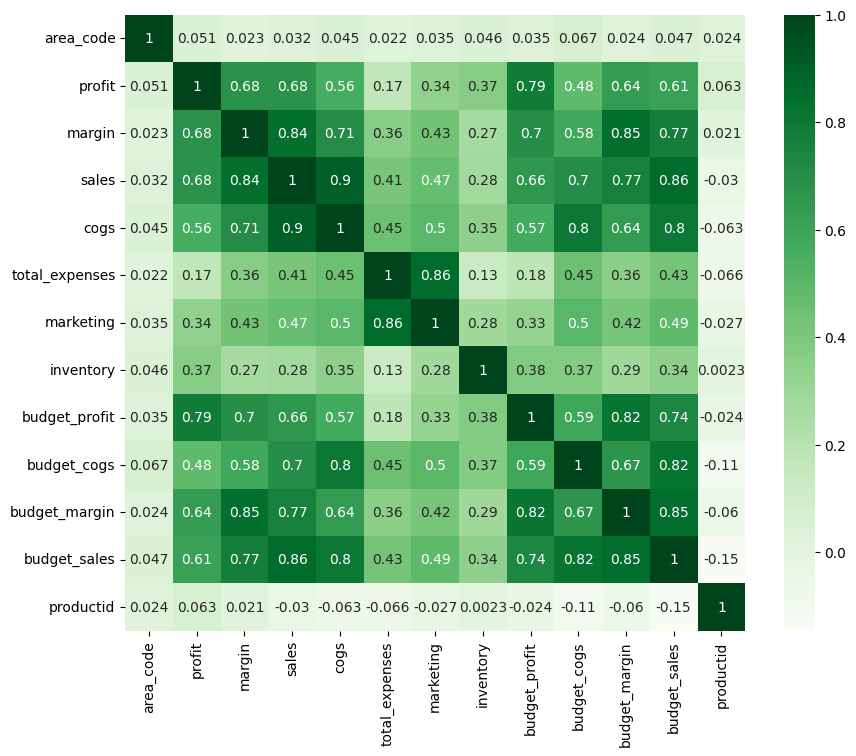

In [5]:
sns.heatmap(sales.corr(),
            cmap = "Greens", 
           annot = True)
plt.savefig('../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/heatmap1.png');

In [6]:
mask = np.triu(np.ones_like(sales.corr(), dtype=np.bool))

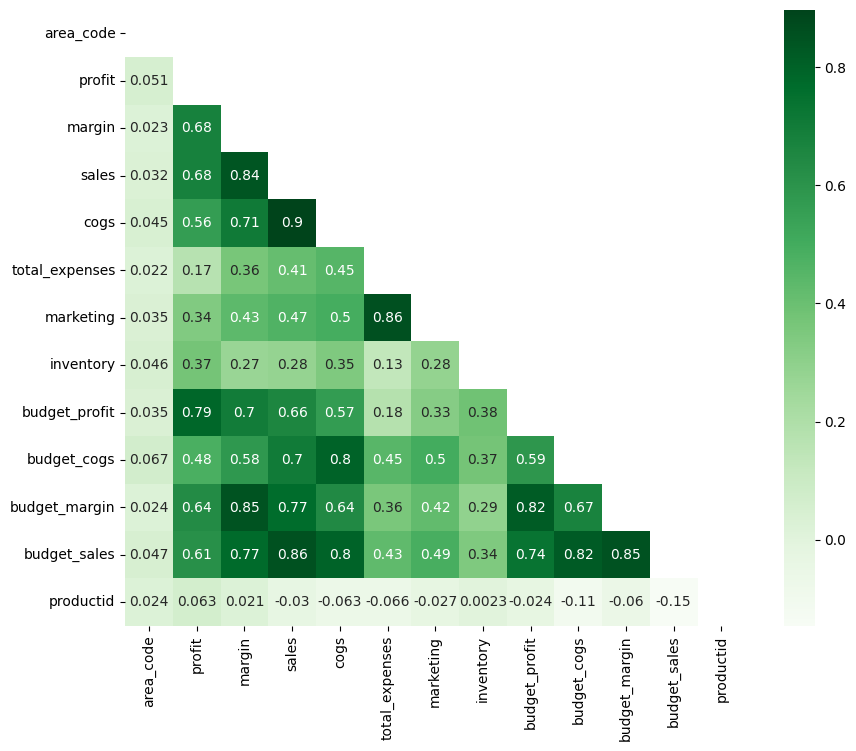

In [7]:
sns.heatmap(sales.corr(),
            cmap = "Greens",
            mask = mask, 
           annot = True);



4. Guardad la gráfica del heatmap.